In [1]:
from datasets import LungDataset
from densenet import DenseNet
import utils

from torchvision import transforms

In [2]:
# Define data loader arguments
train_transform = transforms.Compose([
    transforms.RandomResizedCrop((150, 150), scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

dataloader_args = {
    'dataset_cls'    : LungDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'test_transform' : test_transform,
    'batch_size'     : 64,
#     'shuffle'        : True,
}

In [3]:
# Define model arguments
model_args = {
    'num_input_channels': 1,
    'growth_rate'       : 16,
    'block_config'      : (4, 8, 16, 12),
    'num_init_features' : 32,
    'bn_size'           : 4,
    'drop_rate'         : 0,
    'num_classes'       : 3,
}

In [4]:
# Define training arguments
def lr_scheduler(epoch, learning_rate):
    if epoch % 20 == 0:
        learning_rate /= 10
    return learning_rate

training_args = {
    'device'       :'cuda',
    'epochs'       : 50,
    'optimizer'    : 'Adam',
    'learning_rate': 0.01,
    'lr_scheduler' : lr_scheduler,
    'save_interval': 30,
    'model_path'   : './models/three-class-classifier.pt',
    'history_path' : './history/three-class-classifier.pickle',
}

In [5]:
# Create data loaders
train_loader, test_loader, val_loader = utils.get_dataloaders(**dataloader_args)

In [6]:
# Instantiate model
model = DenseNet(**model_args)

In [7]:
# Carry out training on the model
history = utils.train_model(model, train_loader, test_loader, **training_args)

[Mon Mar 22 04:09:11 2021] Training started


[Mon Mar 22 04:09:23 2021] Time elapsed: 0:11 - loss: 0.560 - acc: 0.710 - recall: 0.798 - f1: 0.742 - test_loss: 1.216 - test_acc: 0.613 - test_recall: 0.721 - test_f1: 0.657


[Mon Mar 22 04:09:35 2021] Time elapsed: 0:23 - loss: 0.435 - acc: 0.773 - recall: 0.845 - f1: 0.797 - test_loss: 23.056 - test_acc: 0.284 - test_recall: 0.193 - test_f1: 0.064


[Mon Mar 22 04:09:46 2021] Time elapsed: 0:35 - loss: 0.417 - acc: 0.781 - recall: 0.848 - f1: 0.806 - test_loss: 0.972 - test_acc: 0.580 - test_recall: 0.630 - test_f1: 0.617


[Mon Mar 22 04:09:57 2021] Time elapsed: 0:46 - loss: 0.393 - acc: 0.792 - recall: 0.856 - f1: 0.816 - test_loss: 0.931 - test_acc: 0.670 - test_recall: 0.691 - test_f1: 0.683


[Mon Mar 22 04:10:09 2021] Time elapsed: 0:58 - loss: 0.380 - acc: 0.798 - recall: 0.860 - f1: 0.824 - test_loss: 0.529 - test_acc: 0.750 - test_recall: 0.823 - test_f1: 0.797


[Mon Mar 22 04:10:20 2021] Time elapsed: 1:09 - loss: 0.362 - acc: 0.805 - recall: 0.866 - f1: 0.831 - test_loss: 0.676 - test_acc: 0.653 - test_recall: 0.763 - test_f1: 0.701


[Mon Mar 22 04:10:32 2021] Time elapsed: 1:20 - loss: 0.356 - acc: 0.812 - recall: 0.868 - f1: 0.840 - test_loss: 1.574 - test_acc: 0.658 - test_recall: 0.681 - test_f1: 0.666


[Mon Mar 22 04:10:43 2021] Time elapsed: 1:31 - loss: 0.354 - acc: 0.808 - recall: 0.867 - f1: 0.831 - test_loss: 2.095 - test_acc: 0.453 - test_recall: 0.440 - test_f1: 0.451


[Mon Mar 22 04:10:54 2021] Time elapsed: 1:43 - loss: 0.330 - acc: 0.819 - recall: 0.873 - f1: 0.846 - test_loss: 0.734 - test_acc: 0.702 - test_recall: 0.795 - test_f1: 0.757


[Mon Mar 22 04:11:06 2021] Time elapsed: 1:54 - loss: 0.328 - acc: 0.819 - recall: 0.874 - f1: 0.844 - test_loss: 1.477 - test_acc: 0.664 - test_recall: 0.653 - test_f1: 0.679


[Mon Mar 22 04:11:17 2021] Time elapsed: 2:06 - loss: 0.318 - acc: 0.824 - recall: 0.877 - f1: 0.850 - test_loss: 1.086 - test_acc: 0.647 - test_recall: 0.762 - test_f1: 0.697


[Mon Mar 22 04:11:28 2021] Time elapsed: 2:17 - loss: 0.320 - acc: 0.834 - recall: 0.885 - f1: 0.860 - test_loss: 0.544 - test_acc: 0.774 - test_recall: 0.820 - test_f1: 0.787


[Mon Mar 22 04:11:39 2021] Time elapsed: 2:28 - loss: 0.313 - acc: 0.833 - recall: 0.882 - f1: 0.860 - test_loss: 2.191 - test_acc: 0.535 - test_recall: 0.537 - test_f1: 0.549


[Mon Mar 22 04:11:50 2021] Time elapsed: 2:39 - loss: 0.314 - acc: 0.828 - recall: 0.879 - f1: 0.855 - test_loss: 0.515 - test_acc: 0.755 - test_recall: 0.834 - test_f1: 0.806


[Mon Mar 22 04:12:02 2021] Time elapsed: 2:51 - loss: 0.302 - acc: 0.840 - recall: 0.888 - f1: 0.865 - test_loss: 0.622 - test_acc: 0.781 - test_recall: 0.843 - test_f1: 0.835


[Mon Mar 22 04:12:13 2021] Time elapsed: 3:02 - loss: 0.301 - acc: 0.839 - recall: 0.887 - f1: 0.865 - test_loss: 1.278 - test_acc: 0.602 - test_recall: 0.723 - test_f1: 0.655


[Mon Mar 22 04:12:25 2021] Time elapsed: 3:14 - loss: 0.282 - acc: 0.848 - recall: 0.894 - f1: 0.874 - test_loss: 0.978 - test_acc: 0.668 - test_recall: 0.766 - test_f1: 0.709


[Mon Mar 22 04:12:36 2021] Time elapsed: 3:25 - loss: 0.285 - acc: 0.843 - recall: 0.888 - f1: 0.871 - test_loss: 1.164 - test_acc: 0.634 - test_recall: 0.749 - test_f1: 0.683


[Mon Mar 22 04:12:47 2021] Time elapsed: 3:36 - loss: 0.265 - acc: 0.859 - recall: 0.901 - f1: 0.884 - test_loss: 1.261 - test_acc: 0.646 - test_recall: 0.741 - test_f1: 0.720


[Mon Mar 22 04:12:59 2021] Time elapsed: 3:47 - loss: 0.262 - acc: 0.859 - recall: 0.901 - f1: 0.886 - test_loss: 0.807 - test_acc: 0.722 - test_recall: 0.806 - test_f1: 0.780


[Mon Mar 22 04:13:10 2021] Time elapsed: 3:59 - loss: 0.229 - acc: 0.876 - recall: 0.915 - f1: 0.902 - test_loss: 0.850 - test_acc: 0.740 - test_recall: 0.825 - test_f1: 0.798


[Mon Mar 22 04:13:21 2021] Time elapsed: 4:10 - loss: 0.228 - acc: 0.878 - recall: 0.915 - f1: 0.903 - test_loss: 0.901 - test_acc: 0.697 - test_recall: 0.788 - test_f1: 0.761


[Mon Mar 22 04:13:32 2021] Time elapsed: 4:21 - loss: 0.213 - acc: 0.885 - recall: 0.919 - f1: 0.909 - test_loss: 0.926 - test_acc: 0.724 - test_recall: 0.809 - test_f1: 0.783


[Mon Mar 22 04:13:44 2021] Time elapsed: 4:32 - loss: 0.197 - acc: 0.898 - recall: 0.927 - f1: 0.920 - test_loss: 0.808 - test_acc: 0.748 - test_recall: 0.831 - test_f1: 0.807


[Mon Mar 22 04:13:55 2021] Time elapsed: 4:44 - loss: 0.199 - acc: 0.897 - recall: 0.927 - f1: 0.921 - test_loss: 0.884 - test_acc: 0.740 - test_recall: 0.818 - test_f1: 0.798


[Mon Mar 22 04:14:06 2021] Time elapsed: 4:55 - loss: 0.181 - acc: 0.903 - recall: 0.932 - f1: 0.924 - test_loss: 0.914 - test_acc: 0.763 - test_recall: 0.836 - test_f1: 0.818


[Mon Mar 22 04:14:18 2021] Time elapsed: 5:06 - loss: 0.165 - acc: 0.916 - recall: 0.940 - f1: 0.935 - test_loss: 0.716 - test_acc: 0.773 - test_recall: 0.843 - test_f1: 0.828


[Mon Mar 22 04:14:29 2021] Time elapsed: 5:18 - loss: 0.164 - acc: 0.917 - recall: 0.941 - f1: 0.937 - test_loss: 0.887 - test_acc: 0.764 - test_recall: 0.826 - test_f1: 0.817


[Mon Mar 22 04:14:41 2021] Time elapsed: 5:29 - loss: 0.159 - acc: 0.918 - recall: 0.941 - f1: 0.938 - test_loss: 0.961 - test_acc: 0.748 - test_recall: 0.817 - test_f1: 0.801


[Mon Mar 22 04:14:52 2021] Time elapsed: 5:40 - loss: 0.134 - acc: 0.936 - recall: 0.955 - f1: 0.952 - test_loss: 0.850 - test_acc: 0.781 - test_recall: 0.840 - test_f1: 0.833


[Mon Mar 22 04:15:03 2021] Time elapsed: 5:52 - loss: 0.127 - acc: 0.939 - recall: 0.957 - f1: 0.955 - test_loss: 1.241 - test_acc: 0.709 - test_recall: 0.790 - test_f1: 0.770


[Mon Mar 22 04:15:15 2021] Time elapsed: 6:04 - loss: 0.117 - acc: 0.945 - recall: 0.961 - f1: 0.959 - test_loss: 1.110 - test_acc: 0.738 - test_recall: 0.807 - test_f1: 0.793


[Mon Mar 22 04:15:26 2021] Time elapsed: 6:15 - loss: 0.113 - acc: 0.946 - recall: 0.960 - f1: 0.958 - test_loss: 0.813 - test_acc: 0.790 - test_recall: 0.850 - test_f1: 0.843


[Mon Mar 22 04:15:38 2021] Time elapsed: 6:26 - loss: 0.087 - acc: 0.961 - recall: 0.971 - f1: 0.971 - test_loss: 1.163 - test_acc: 0.756 - test_recall: 0.826 - test_f1: 0.814


[Mon Mar 22 04:15:49 2021] Time elapsed: 6:38 - loss: 0.095 - acc: 0.959 - recall: 0.970 - f1: 0.969 - test_loss: 0.958 - test_acc: 0.747 - test_recall: 0.818 - test_f1: 0.803


[Mon Mar 22 04:16:00 2021] Time elapsed: 6:49 - loss: 0.073 - acc: 0.966 - recall: 0.975 - f1: 0.974 - test_loss: 1.134 - test_acc: 0.751 - test_recall: 0.811 - test_f1: 0.809


[Mon Mar 22 04:16:11 2021] Time elapsed: 7:00 - loss: 0.081 - acc: 0.964 - recall: 0.972 - f1: 0.972 - test_loss: 1.165 - test_acc: 0.713 - test_recall: 0.778 - test_f1: 0.774


[Mon Mar 22 04:16:23 2021] Time elapsed: 7:12 - loss: 0.074 - acc: 0.968 - recall: 0.976 - f1: 0.976 - test_loss: 1.125 - test_acc: 0.728 - test_recall: 0.792 - test_f1: 0.791


[Mon Mar 22 04:16:34 2021] Time elapsed: 7:23 - loss: 0.055 - acc: 0.978 - recall: 0.984 - f1: 0.984 - test_loss: 1.057 - test_acc: 0.732 - test_recall: 0.794 - test_f1: 0.786


[Mon Mar 22 04:16:45 2021] Time elapsed: 7:34 - loss: 0.041 - acc: 0.983 - recall: 0.987 - f1: 0.987 - test_loss: 1.197 - test_acc: 0.743 - test_recall: 0.804 - test_f1: 0.795


[Mon Mar 22 04:16:56 2021] Time elapsed: 7:45 - loss: 0.033 - acc: 0.987 - recall: 0.991 - f1: 0.991 - test_loss: 1.149 - test_acc: 0.751 - test_recall: 0.811 - test_f1: 0.808


[Mon Mar 22 04:17:08 2021] Time elapsed: 7:57 - loss: 0.033 - acc: 0.987 - recall: 0.992 - f1: 0.991 - test_loss: 1.198 - test_acc: 0.734 - test_recall: 0.795 - test_f1: 0.788


[Mon Mar 22 04:17:19 2021] Time elapsed: 8:08 - loss: 0.029 - acc: 0.991 - recall: 0.993 - f1: 0.993 - test_loss: 1.068 - test_acc: 0.751 - test_recall: 0.817 - test_f1: 0.807


[Mon Mar 22 04:17:31 2021] Time elapsed: 8:20 - loss: 0.028 - acc: 0.989 - recall: 0.991 - f1: 0.992 - test_loss: 1.302 - test_acc: 0.735 - test_recall: 0.800 - test_f1: 0.794


[Mon Mar 22 04:17:42 2021] Time elapsed: 8:31 - loss: 0.030 - acc: 0.990 - recall: 0.993 - f1: 0.993 - test_loss: 1.078 - test_acc: 0.772 - test_recall: 0.833 - test_f1: 0.825


[Mon Mar 22 04:17:54 2021] Time elapsed: 8:42 - loss: 0.026 - acc: 0.990 - recall: 0.993 - f1: 0.993 - test_loss: 1.252 - test_acc: 0.744 - test_recall: 0.807 - test_f1: 0.801


[Mon Mar 22 04:18:05 2021] Time elapsed: 8:54 - loss: 0.025 - acc: 0.991 - recall: 0.994 - f1: 0.994 - test_loss: 1.222 - test_acc: 0.731 - test_recall: 0.805 - test_f1: 0.792


[Mon Mar 22 04:18:16 2021] Time elapsed: 9:05 - loss: 0.023 - acc: 0.992 - recall: 0.995 - f1: 0.995 - test_loss: 1.222 - test_acc: 0.751 - test_recall: 0.809 - test_f1: 0.805


[Mon Mar 22 04:18:27 2021] Time elapsed: 9:16 - loss: 0.019 - acc: 0.994 - recall: 0.996 - f1: 0.996 - test_loss: 1.450 - test_acc: 0.713 - test_recall: 0.779 - test_f1: 0.771


[Mon Mar 22 04:18:39 2021] Time elapsed: 9:28 - loss: 0.022 - acc: 0.993 - recall: 0.995 - f1: 0.995 - test_loss: 1.242 - test_acc: 0.751 - test_recall: 0.813 - test_f1: 0.807

[Mon Mar 22 04:18:39 2021] Training complete - Time elapsed: 9:28


In [8]:
# Save the results of training
utils.save_model(model, training_args['model_path'])

utils.save_history(history, training_args['history_path'])

In [9]:
# Load the results of training
model = utils.load_model(training_args['model_path'])

history = utils.load_history(training_args['history_path'])

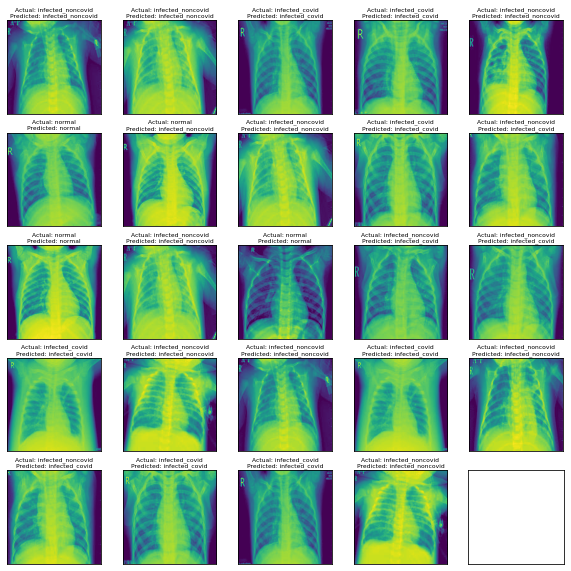

Validation loss: 2.258 - Validation accuracy: 0.792 - Validation F1-score: 0.776 - Validation recall: 0.760


In [10]:
# Evaluate the performance of the model on the validation set
model.to(training_args['device'])

results = utils.run_model(model, val_loader, show_results=True)

print(f"Validation loss: {results['loss']:.3f} -",
      f"Validation accuracy: {results['accuracy']:.3f} -",
      f"Validation F1-score: {results['f1']:.3f} -",
      f"Validation recall: {results['recall']:.3f}")

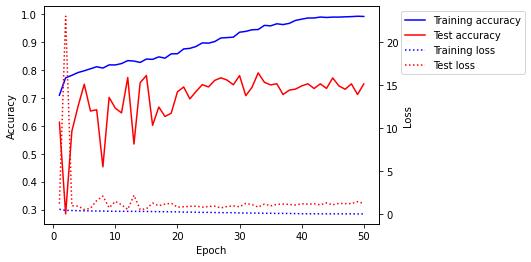

In [11]:
utils.plot_history(history, metric='accuracy')